In [11]:
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as mpla

In [7]:
# Classic Runge-Kutta 4 method for integrating a system of two 1st order differential equations
def rungeKutta4(t0, tf, y0, ydot0, N, f1, f2):
  t = np.linspace(t0, tf, N+1)
  h = (tf - t0) / N
  y = np.zeros(N+1)
  ydot = np.zeros(N+1)
  y[0] = y0
  ydot[0] = ydot0
  for i in range(N):
    k11 = h * f1(t[i], y[i], ydot[i]);
    k21 = h * f2(t[i], y[i], ydot[i]);
    k12 = h * f1(t[i] + 0.5 * h, y[i] + 0.5 * k11, ydot[i] + 0.5 * k21);
    k22 = h * f2(t[i] + 0.5 * h, y[i] + 0.5 * k11, ydot[i] + 0.5 * k21);
    k13 = h * f1(t[i] + 0.5 * h, y[i] + 0.5 * k12, ydot[i] + 0.5 * k22);
    k23 = h * f2(t[i] + 0.5 * h, y[i] + 0.5 * k12, ydot[i] + 0.5 * k22);
    k14 = h * f1(t[i] + h, y[i] + k13, ydot[i] + k23);
    k24 = h * f2(t[i] + h, y[i] + k13, ydot[i] + k23);
    y[i+1] = y[i] + (k11 + 2 * k12 + 2 * k13 + k14) / 6;
    ydot[i+1] = ydot[i] + (k21 + 2 * k22 + 2 * k23 + k24) / 6;
  return t, y, ydot

In [77]:
# Defining parameters of the Pendulum
t0 = 0
tf = 5.2
theta0 = 2.
omega0 = 0
N = 300;
h = (tf - t0) / N
g = 9.8
l = 1
# Funcitons that represent the equivalent differential equations of the Pendulum
def angularVelocity(t, theta, omega): return omega
def angularAcceleration(t, theta, omega): return -g / l * np.sin(theta)

# Numerical solution
t, theta, omega = rungeKutta4(t0,tf, theta0, omega0, N, angularVelocity, angularAcceleration)
# Cartesian coordinates of pendulum
x = l * np.sin(theta)
y = l * -np.cos(theta)

<IPython.core.display.Javascript object>

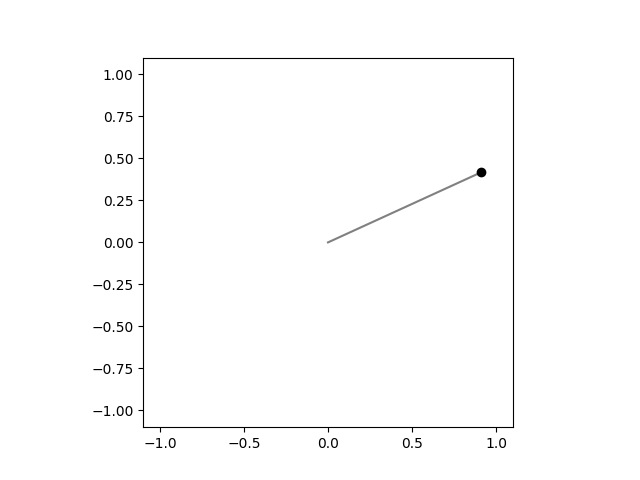

In [78]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))

string, = ax.plot([0, x[0]], [0, y[0]], color='grey')
mass, = ax.plot(x[0], y[0], color='black', marker='o')

def animate(i):
  string.set_data([0, x[i]], [0, y[i]])
  mass.set_data([x[i]], [y[i]])

fps = 30
anim = mpla.FuncAnimation(fig, animate, frames=len(t))
wr = mpla.FFMpegWriter(fps=fps)
anim.save('animation.gif', writer=wr)
from IPython.display import Image
Image('animation.gif')